<h1>Imports

In [1]:
import sys
sys.path.append(r'C:\Users\bield\Documents\projsData\proj-1\utils')

import utils as u
import pandas as pd
from pyspark.sql import (functions as F,
                        DataFrame,
                        Window)
import matplotlib.pyplot as plt



<h3>Create spark session

In [2]:
spark = u.createSparkSesion()

<h1>Code

In [3]:
df_lol = spark.read.csv("..\..\datasets\League of legend Champions 2024.csv",header=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\bield\AppData\Local\Temp\ipykernel_19444\4210075137.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_lol = spark.read.csv("..\..\datasets\League of legend Champions 2024.csv",header=True)


In [4]:
df_lol.takePandas(10)

,Name,Nick Name,Classes,Release Date,Last Changed,Blue Essence,RP,Difficulty,Role,Range type,Resourse type,Base HP,Base mana
0,Aatrox,The darkin blade,Juggernaut,2013-06-13,V14.14,4800,880,Advanced,Top,Melee,Blood Well,650,0
1,Ahri,The nine-tailed fox,Burst,2011-12-14,V14.18,3150,790,Intermediate,Middle,Ranged,Mana,590,418
2,Akali,The rogue assassin,Assassin,2010-05-11,V14.18,3150,790,Expert,"Top,Middle",Melee,Energy,600,200
3,Akshan,The rogue sentinel,Marksman Assassin,2021-07-22,V14.14,4800,880,Intermediate_Plus,Middle,Ranged,Mana,630,350
4,Alistar,The minotaur,Vanguard,2009-02-21,V14.16,1350,585,Novice,Support,Melee,Mana,685,350
5,Amumu,The sad mummy,Vanguard,2009-06-26,V14.9,450,260,Beginner,"Jungle,Support",Melee,Mana,685,285
6,Anivia,The cryophoenix,Battlemage,2009-07-10,V13.22,3150,790,Intermediate_Plus,Middle,Ranged,Mana,550,495
7,Annie,The dark child,Burst,2009-02-21,V14.4,450,260,Beginner,Middle,Ranged,Mana,560,418
8,Aphelios,The weapon of the faithful,Marksman,2019-12-11,V14.14,4800,880,Expert,Bottom,Ranged,Mana,580,348
9,Ashe,The frost archer,Marksman,2009-02-21,V14.12,450,260,Beginner,"Bottom,Support",Ranged,Mana,640,280


In [5]:
df_lol.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Nick Name: string (nullable = true)
 |-- Classes: string (nullable = true)
 |-- Release Date: string (nullable = true)
 |-- Last Changed: string (nullable = true)
 |-- Blue Essence: string (nullable = true)
 |-- RP: string (nullable = true)
 |-- Difficulty: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Range type: string (nullable = true)
 |-- Resourse type: string (nullable = true)
 |-- Base HP: string (nullable = true)
 |-- Base mana: string (nullable = true)



<h1> Roles distribution

Pergunta: Quais papéis (Role) são mais comuns entre os campeões?<br>
Insight: Distribuição percentual dos campeões por papel (ex.: Lutador, Mago, Suporte).<br>
Benefício: Identificar qual categoria de campeões é mais dominante e se há algum desequilíbrio entre os papéis.

In [6]:
df_lol.count()

168

In [7]:
roles_distribution = (df_lol.withColumnRenamed("Classes","classes")
                      .groupBy("classes")
                      .count()
                      .withColumn("share",F.col("count")/df_lol.count())
                      .withColumn("classes",F.when(
                                                    F.col("count")<=1,F.lit("Others")
                                                  ).otherwise(F.col("classes"))
                                  )
                      .groupBy("classes","count","share")
                      .agg(
                          F.sum(F.col("count")).alias("count_"),
                          F.sum(F.col("share")).alias("share_")
                      )
                      .orderBy(F.desc("count_"))
                      .drop("count","share")
                      )

pd_roles_distribution = roles_distribution.toPandas()

In [8]:
roles_distribution.takePandas(1)

,classes,count_,share_
0,Marksman,21,0.125


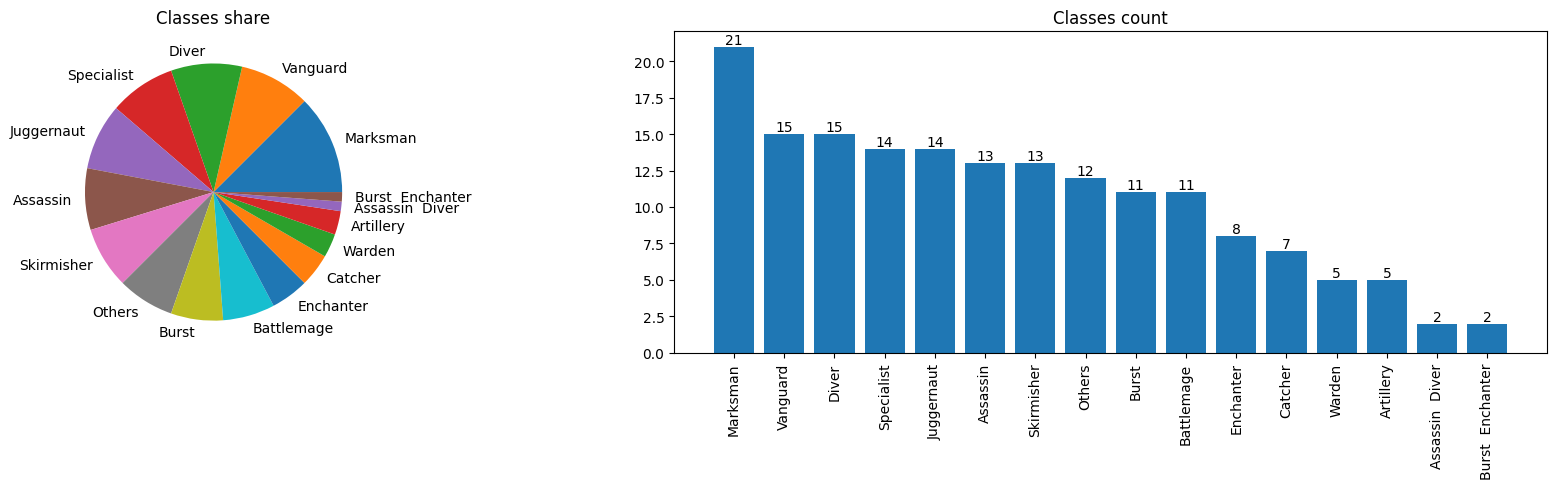

In [9]:
fig, ax1 = plt.subplots(1,2,figsize=(18, 5))

ax1[0].pie(pd_roles_distribution['share_'],labels = pd_roles_distribution['classes'], )
bars = ax1[1].bar(pd_roles_distribution['classes'],pd_roles_distribution['count_'],label="classes count")

for bar in bars:
    yval = bar.get_height()
    ax1[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    
ax1[0].set_title('Classes share')
ax1[1].set_title('Classes count')



plt.xticks(rotation=90)
plt.tight_layout()
